In [1]:
%matplotlib inline

In [14]:
"""MB Metodo da bissecao para funcoes unidimensionais
entrada: 
    fx: uma string dependendo de x, i.e., a funcao
           (e.g., 'x^2 + 1', 'x^2*cos(x)', etc.) 
    a: limite inferior do dominio
    b: limite superior do dominio
    tol: tolerancia    
    N: numero maximo de iteracoes do metodo

saida: 
    xm: raiz da funcao
"""

import inspect, re
import numpy as np

def bisecao(f,a,b,tol,N):
        
    # TODO identificar a variável usada na função 
    #      Aqui, tentei assumir que apenas uma era usada (e.g. 'x'),
    #      mas foi complicado generalizar quando há objeto numpy
    #var = re.search('[a-zA-Z]+',f)
    #var = var.group()

    # adiciona as chamadas das funções de numpy
    f = re.sub('(cos|sin|tan|exp)', r'np.\1', f)
    
    # identifica a variavel
    var = re.search(r'([a-zA-Z][\w]*) ?([\+\-\/*]|$|\))', f).group(1)
    
    print('f('+ var +') = ' + f + '\n')
    
    # cria função anônima
    f = eval('lambda ' + var + ' :' + f)
    
    varPlot = np.arange(a,b+1,1)

    # Se função não for de uma variável, lança erro.
    # Mais aplicável se o caso geral fosse implementado.        
    if len(inspect.getfullargspec(f).args) - 1 > 0:    
        raise ValueError('O código é válido apenas para uma variável.')

    # calcula valor da função nos extremos
    fa = f(a) 
    fb = f(b)
    
    # verifica sinal da função para o intervalo passado     
    if fa*fb >= 0:
        raise ValueError('A função deve ter sinais opostos em a e b!')
    
    # flag usada para prevenir a obtenção da raiz 
    # antes de o intervalo ter sido 
    # suficientemente reduzido
    done = 0;

    # loop principal

    # bisecta o intervalo
    xm = (a+b)/2

    i = 1 # contador 
    xms = [xm]
    fxms = [f(xm)]
    
    while abs(a-b) > tol and ( not done or N != 0 ):
    # avalia a função no ponto médio
        fxm = f(xm)
        print("(i = {0:d}) f(xm)={1:f} | f(a)={2:f} | f(b)={3:f}".format(i,fxm,fa,fb))
   
        if fa*fxm < 0:       # Raiz esta à esquerda de xm
            b = xm
            fb = fxm
            xm = (a+b)/2
        elif fxm*fb < 0:     # Raiz esta à direita de xm
            a = xm
            fa = fxm
            xm = (a+b)/2
        else:               # Achamos a raiz
            done = 1
        
        xms.append(xm)
        fxms.append(f(xm))

        N -= 1              # Atualiza passo
        i += 1              # Atualiza contador
    
    

    colors = []
    
    for i in range(len(xms)):
        colors.append(int((256/len(xms)) * i))
    
    plt.plot(varPlot, f(varPlot))
    plt.scatter(xms, fxms, c=colors, cmap='Wistia')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title("Xm's testados ao longo da função")
    plt.colorbar()
    plt.show()
    print("Solução encontrada: {0}".format(xm))

    return xm

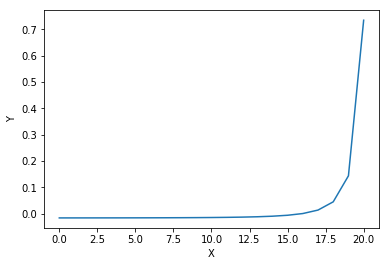

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect, newton

# Dados de entrada

t = np.arange(0,520,1)   # tempo [s]
c = 1.46   # coeficiente de arrasto [kg/s]
m = 90     # massa [kg]
g = 9.81   # constante de gravidade [m/s2]

# Dados de saída

## velocidade terminal [m/s]
v_ms1 = (g*m/c)*(1 - np.exp((-c/m)*t))

# velocidade terminal [km/h]
v_kh1 = (1/3.6)*v_ms1;

# gráfico tempo x velocidade
#plt.figure
#plt.plot(t,v_ms1)
#plt.xlabel('t [s]')
#plt.ylabel('v [m/s]')
#plt.title('Velocidade terminal - paraquedista')

#############################################
# Dados de entrada

x = np.arange(0,21,1)   # tempo [s]
#x = 20
ca = 42   # coeficiente de arrasto [kg/s]
cb = 28     # massa [kg]
cc = 4   # constante de gravidade [m/s2]
K = 0.016

# Dados de saída

f = ((cc + x)/((ca - 2 * x)**2 * (cb - x))) - K 

#print(f)
# velocidade terminal [km/h]
#v_kh1 = (1/3.6)*v_ms1;

# gráfico tempo x velocidade
plt.figure
plt.plot(x,f)
plt.xlabel('X')
plt.ylabel('Y')

f(c) = -42 + 686.7*(1 - np.exp(-6*c/35))/c

(i = 1) f(xm)=2.600284 | f(a)=7.910578 | f(b)=-1.844622
(i = 2) f(xm)=0.281205 | f(a)=2.600284 | f(b)=-1.844622
(i = 3) f(xm)=-0.804573 | f(a)=0.281205 | f(b)=-1.844622
(i = 4) f(xm)=-0.267556 | f(a)=0.281205 | f(b)=-0.804573
(i = 5) f(xm)=0.005337 | f(a)=0.281205 | f(b)=-0.267556
(i = 6) f(xm)=-0.131479 | f(a)=0.005337 | f(b)=-0.267556
(i = 7) f(xm)=-0.063164 | f(a)=0.005337 | f(b)=-0.131479
(i = 8) f(xm)=-0.028937 | f(a)=0.005337 | f(b)=-0.063164
(i = 9) f(xm)=-0.011806 | f(a)=0.005337 | f(b)=-0.028937
(i = 10) f(xm)=-0.003236 | f(a)=0.005337 | f(b)=-0.011806
(i = 11) f(xm)=0.001050 | f(a)=0.005337 | f(b)=-0.003236
(i = 12) f(xm)=-0.001093 | f(a)=0.001050 | f(b)=-0.003236
(i = 13) f(xm)=-0.000022 | f(a)=0.001050 | f(b)=-0.001093
(i = 14) f(xm)=0.000514 | f(a)=0.001050 | f(b)=-0.000022
(i = 15) f(xm)=0.000246 | f(a)=0.000514 | f(b)=-0.000022
(i = 16) f(xm)=0.000112 | f(a)=0.000246 | f(b)=-0.000022
(i = 17) f(xm)=0.000045 | f(a)=0.000112 | f(

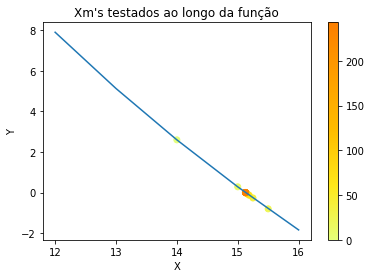

Solução encontrada: 15.127429962158203


In [15]:
import sympy as sp

time = 12     # tempo [s]
mass = 70     # massa [kg]
vel = 42     # velocidade [m/s]
grav = 9.81   # constante de gravidade [m/s2]

# defino variáveis simbólicas
g,m,t,v,c = sp.symbols('g,m,t,v,c')

# expressão geral
f_g = (g*m/c)*(1 - sp.exp((-c/m)*t)) - v

# expressão particular com valores substituídos 
# convertida para string
f_s = str(f_g.subs({'g':grav,'m':mass,'v':vel,'t':time}))

# TODO
# para esta função, teremos que substituir 'exp' por 'np.exp')
#print('f(c) = ' + f_s + '\n')
#f_s = '-42 + 686.7*(1 - np.exp(-6*c/35))/c'

# resolve bisseção
xm = bisecao(f_s,12,16,1e-5,100)

## Tarefa: SUBMÓDULO BISSEÇÃO

* Melhore o código Python tratando os TODOs: 

Tente generalizar o código da bisseção para que identifique automaticamente a variável de entrada utilizada pelo usuário (use expressões regulares e remova o argumento `var` da definição da função).

Note que o trecho simbólico abaixo foi necessário para substituir a função da chamada `exp`, não interpretada por `eval` por uma nova string que usasse `np.exp`.
```python
# TODO
# para esta função, teremos que substituir 'exp' por 'np.exp')
print('f(c) = ' + f_s + '\n')
f_s = '-42 + 686.7*(1 - np.exp(-6*c/35))/c'
```
Tente fazer as correções necessárias no código. **Sugestão:** verifique a função `sympy.core.evalf` do módulo `sympy`)

* Adicione mecanismos de plotagem no código Python 

* Crie um código em Javascript para adicionarmos na página do projeto Numbiosis com o máximo possível de GUI (labels + input data).

* Teste a implementação com um problema realista.


**Problema sugerido:**
Uma reação química reversível

$$2A+B \iff C$$

pode ser caracterizada pela relação de equilíbrio

$$K = \dfrac{c_c}{c_a^2c_b},$$

onde a nomenclatura $c_i$ representa a concentração do constituinte $i$. Suponha que definamos uma variável $x$ como o número de moles de $C$ que são produzidos. A conservação da massa pode ser usada para reformular a relação de equilíbrio como

$$K = \dfrac{(c_{c,0} + x)}{(c_{a,0} - 2x)^2 (c_{b,0} - x),}$$

onde o subscrito $0$ designa a concentração inicial de cada constituinte. Se $K = 0,016$, $c_{a,0} = 42$, $c_{b,0} = 28$ e $c_{c,0} = 4$, determine o valor de $x$. 

(a) Obtenha a solução graficamente. 

(b) Com base em (a), resolva a raiz com suposições iniciais de $x_l = 0$ e $x_u = 20$, com critério de erro de $\epsilon_s = 0,5\%$. (Vide clipping _Definições de erro_ para entender $\epsilon_s$.)

(c) Use o método da bisseção.

f(x) = -0.016 + (x + 4)/((-2*x + 42)**2*(-x + 28))

(i = 1) f(xm)=-0.014393 | f(a)=-0.015919 | f(b)=0.734000
(i = 2) f(xm)=-0.005850 | f(a)=-0.014393 | f(b)=0.734000
(i = 3) f(xm)=0.025788 | f(a)=-0.005850 | f(b)=0.734000
(i = 4) f(xm)=0.003096 | f(a)=-0.005850 | f(b)=0.025788
(i = 5) f(xm)=-0.002277 | f(a)=-0.005850 | f(b)=0.003096
(i = 6) f(xm)=0.000123 | f(a)=-0.002277 | f(b)=0.003096
(i = 7) f(xm)=-0.001139 | f(a)=-0.002277 | f(b)=0.000123
(i = 8) f(xm)=-0.000525 | f(a)=-0.001139 | f(b)=0.000123
(i = 9) f(xm)=-0.000205 | f(a)=-0.000525 | f(b)=0.000123
(i = 10) f(xm)=-0.000042 | f(a)=-0.000205 | f(b)=0.000123
(i = 11) f(xm)=0.000040 | f(a)=-0.000042 | f(b)=0.000123
(i = 12) f(xm)=-0.000001 | f(a)=-0.000042 | f(b)=0.000040


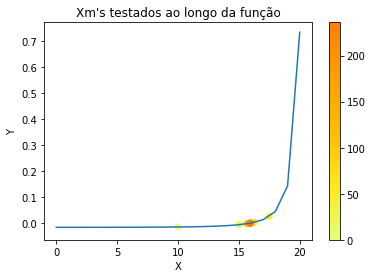

Solução encontrada: 15.92529296875


In [16]:
K0 = 0.016
ca0 = 42
cb0 = 28
cc0 = 4

K, ca, cb, cc, x = sp.symbols('K,ca,cb,cc,x')

f = ((cc + x)/((ca - 2 * x)**2 * (cb - x))) - K

f = str(f.subs({K:K0, ca:ca0, cb:cb0, cc:cc0}))

#f = '((4 + x)/((42 - 2 * x)**2 * (28 - x))) - 0.016'

xm = bisecao(f,0,20,5e-3,100)